In [15]:
import pandas as pd
import numpy as np
import sys
import os
import pickle
import missingno as msno
sys.path.insert(1, '../user_script/')

In [16]:
from dimensional_tools import DimensionalReduction as dr

In [6]:
data_path = '../data/'

In [8]:
df = pd.read_csv(data_path + 'datos_musica_new.csv', encoding='utf8')

In [9]:
df.head()

,t_archivo,c_zero_cr,c_spectral_centroid,c_spectral_bw,c_spectral_rf,c_croma,c_norm_main_signal,c_norm_amplitude_db,c_mfcc_1,c_mfcc_2,...,c_mfcc_14,c_mfcc_15,c_mfcc_16,c_mfcc_17,c_mfcc_18,c_mfcc_19,c_mfcc_20,c_bpm,c_auto_c,tgt
0,crop_139ORACION.mp3,18,3718.611460,4018.727749,8496.157681,0.445984,27198.66602,67515.32813,-63.776653,120.569939,...,2.900476,1.404809,-5.159079,1.606270,-5.578994,5.258808,-5.577647,107.666016,0.669199,mg
1,crop_08Seek&Destroy.mp3,7,3939.607756,3609.940440,7792.548149,0.521793,12548.87109,80284.07813,-120.306099,110.507179,...,3.111072,-2.796549,-10.310349,-2.340406,-7.850484,2.950904,-8.729319,139.674831,0.734163,mg
2,crop_02Rollercoaster.mp3,14,3520.858827,3781.587057,7853.945273,0.589852,25798.61133,78596.86719,-91.056770,136.933136,...,5.675441,1.156862,0.878585,3.190184,-2.802731,6.372932,-4.543976,97.508844,0.328608,mg
3,crop_11BringEmBackAlive.mp3,4,3170.852573,3558.395446,7077.203394,0.478351,30418.28320,71925.75781,-55.035664,134.748535,...,2.137828,-3.307989,-4.235019,0.886602,-5.472085,3.519587,-4.259108,129.199219,0.621544,mg
4,crop_4-04BodomBeachTerror.mp3,0,3031.185078,3008.042682,6038.769985,0.609179,33014.41406,75295.16406,-32.878361,140.106186,...,-0.232262,2.245883,-1.299501,2.268726,-1.357315,2.677248,-4.299150,143.554688,0.642062,mg


# Exploración y definición de la unidad muestral
En este caso la unidad muestral es a nivel pista, por lo que no se requiere de ninguna agrupación adicional

In [10]:
df.shape

(1173, 31)

Desechamos la variable que corresponde con el target.

In [12]:
df.drop(['tgt'], axis=1, inplace=True)

In [38]:
df.set_index(['t_archivo'], inplace=True)

<AxesSubplot:>

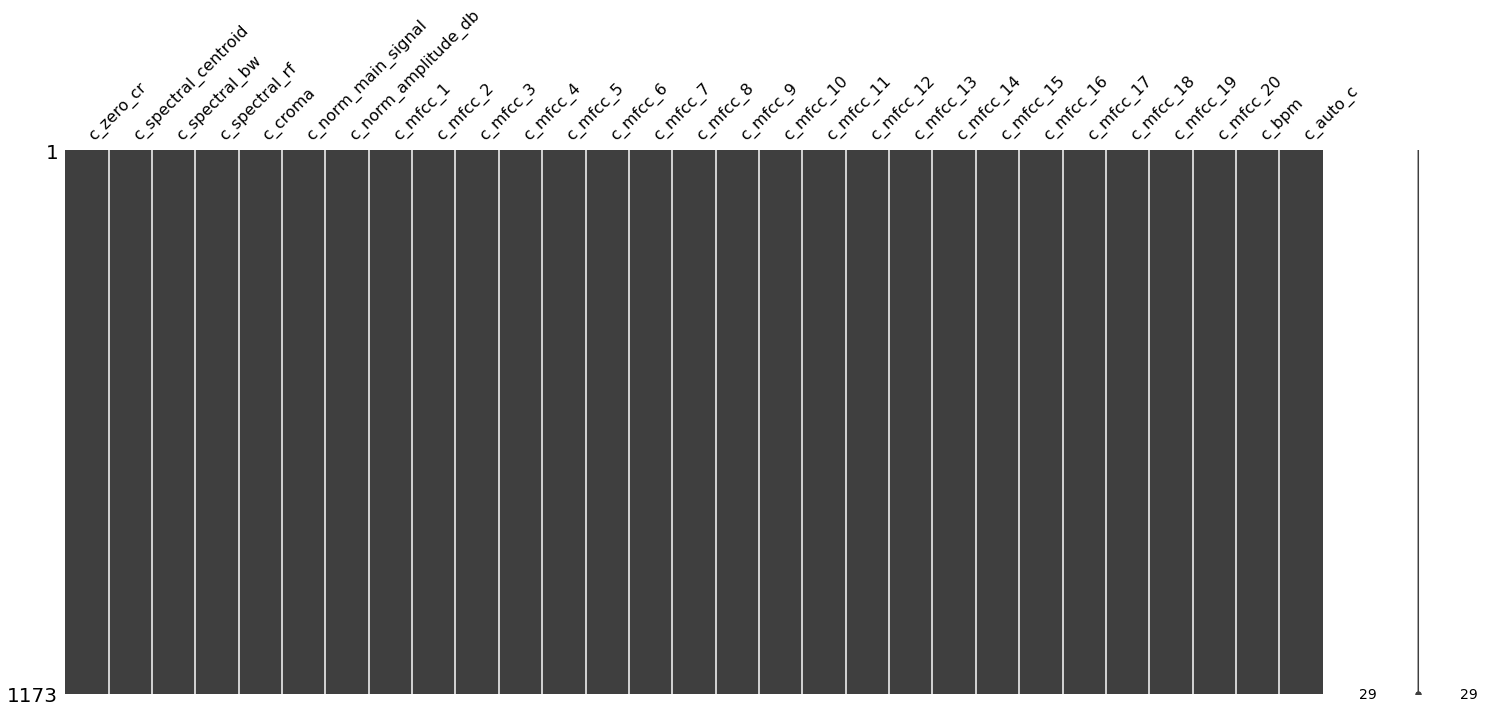

In [39]:
msno.matrix(df)

# Representación en un espacio dimensional reducido

In [40]:
reduce = dr(df, '1')

In [41]:
df_pca, pca = reduce.apply_pca(threshold=0.90, verbose=True)

INFO:
Component 1: 0.25618055939352735
Component 2: 0.1379545347312262
Component 3: 0.09837167611422046
Component 4: 0.08453180559350341
Component 5: 0.046932567262603524
Component 6: 0.04291566782429528
Component 7: 0.038156128833084925
Component 8: 0.03266501534479976
Component 9: 0.02877444599065481
Component 10: 0.025909774478772796
Component 11: 0.02331341166337793
Component 12: 0.02254407415636999
Component 13: 0.01870817911136769
Component 14: 0.01779496304731768
Component 15: 0.014935588914920996
Component 16: 0.014436359694611378
Explained Variance: 0.904124752154654


In [42]:
df_pca.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14,p_15
0,-4.429553,1.654673,-0.622036,-1.153321,0.483627,0.450291,0.966644,-0.082635,1.136401,-0.105213,0.202061,-1.382891,-0.245451,-0.860307,-0.782584,0.471055
1,-2.897294,2.089377,-0.941696,-3.507056,1.343877,1.570442,-1.192156,0.587618,-0.881986,0.111460,0.017814,1.041459,-0.225791,-0.103101,-0.240222,1.060796
2,-3.868282,-0.597916,-3.460818,-0.325711,-0.258717,0.152262,1.138643,-0.585919,2.026460,0.879833,-0.395646,0.413649,-0.082253,-0.237068,0.593042,-0.874277
3,-2.458105,0.415276,-0.483199,-1.638975,0.145859,-0.936528,-0.978068,-0.500180,0.101798,0.732597,0.804390,-0.353665,-0.127988,-0.340275,-0.983203,-0.179536
4,-1.903683,-3.009106,0.421457,-2.431758,0.035716,-1.562014,-1.410203,-0.171702,-0.692374,-0.137377,-0.320520,0.979011,-0.898313,0.335891,0.246118,-0.255982


In [43]:
df_pca.to_excel(data_path + 'datos_musica_new_pca.xlsx')

In [44]:
reduce.apply_mds?

In [45]:
df_mds, mds = reduce.apply_mds(verbose=True)

Process took: 120.93898500000003 time units.


In [46]:
df_mds.to_csv(data_path + 'datos_musica_new_mds.xlsx')

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x28eda97b0> has a label of '_nolegend_' which cannot be automatically added to the legend.



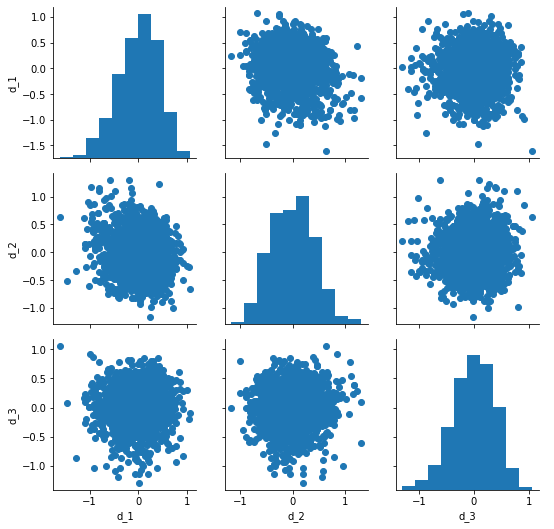

In [48]:
g = sns.PairGrid(df_mds)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/axisgrid.py:156: UserWarning:

The handle <matplotlib.patches.Patch object at 0x17c0f9f00> has a label of '_nolegend_' which cannot be automatically added to the legend.



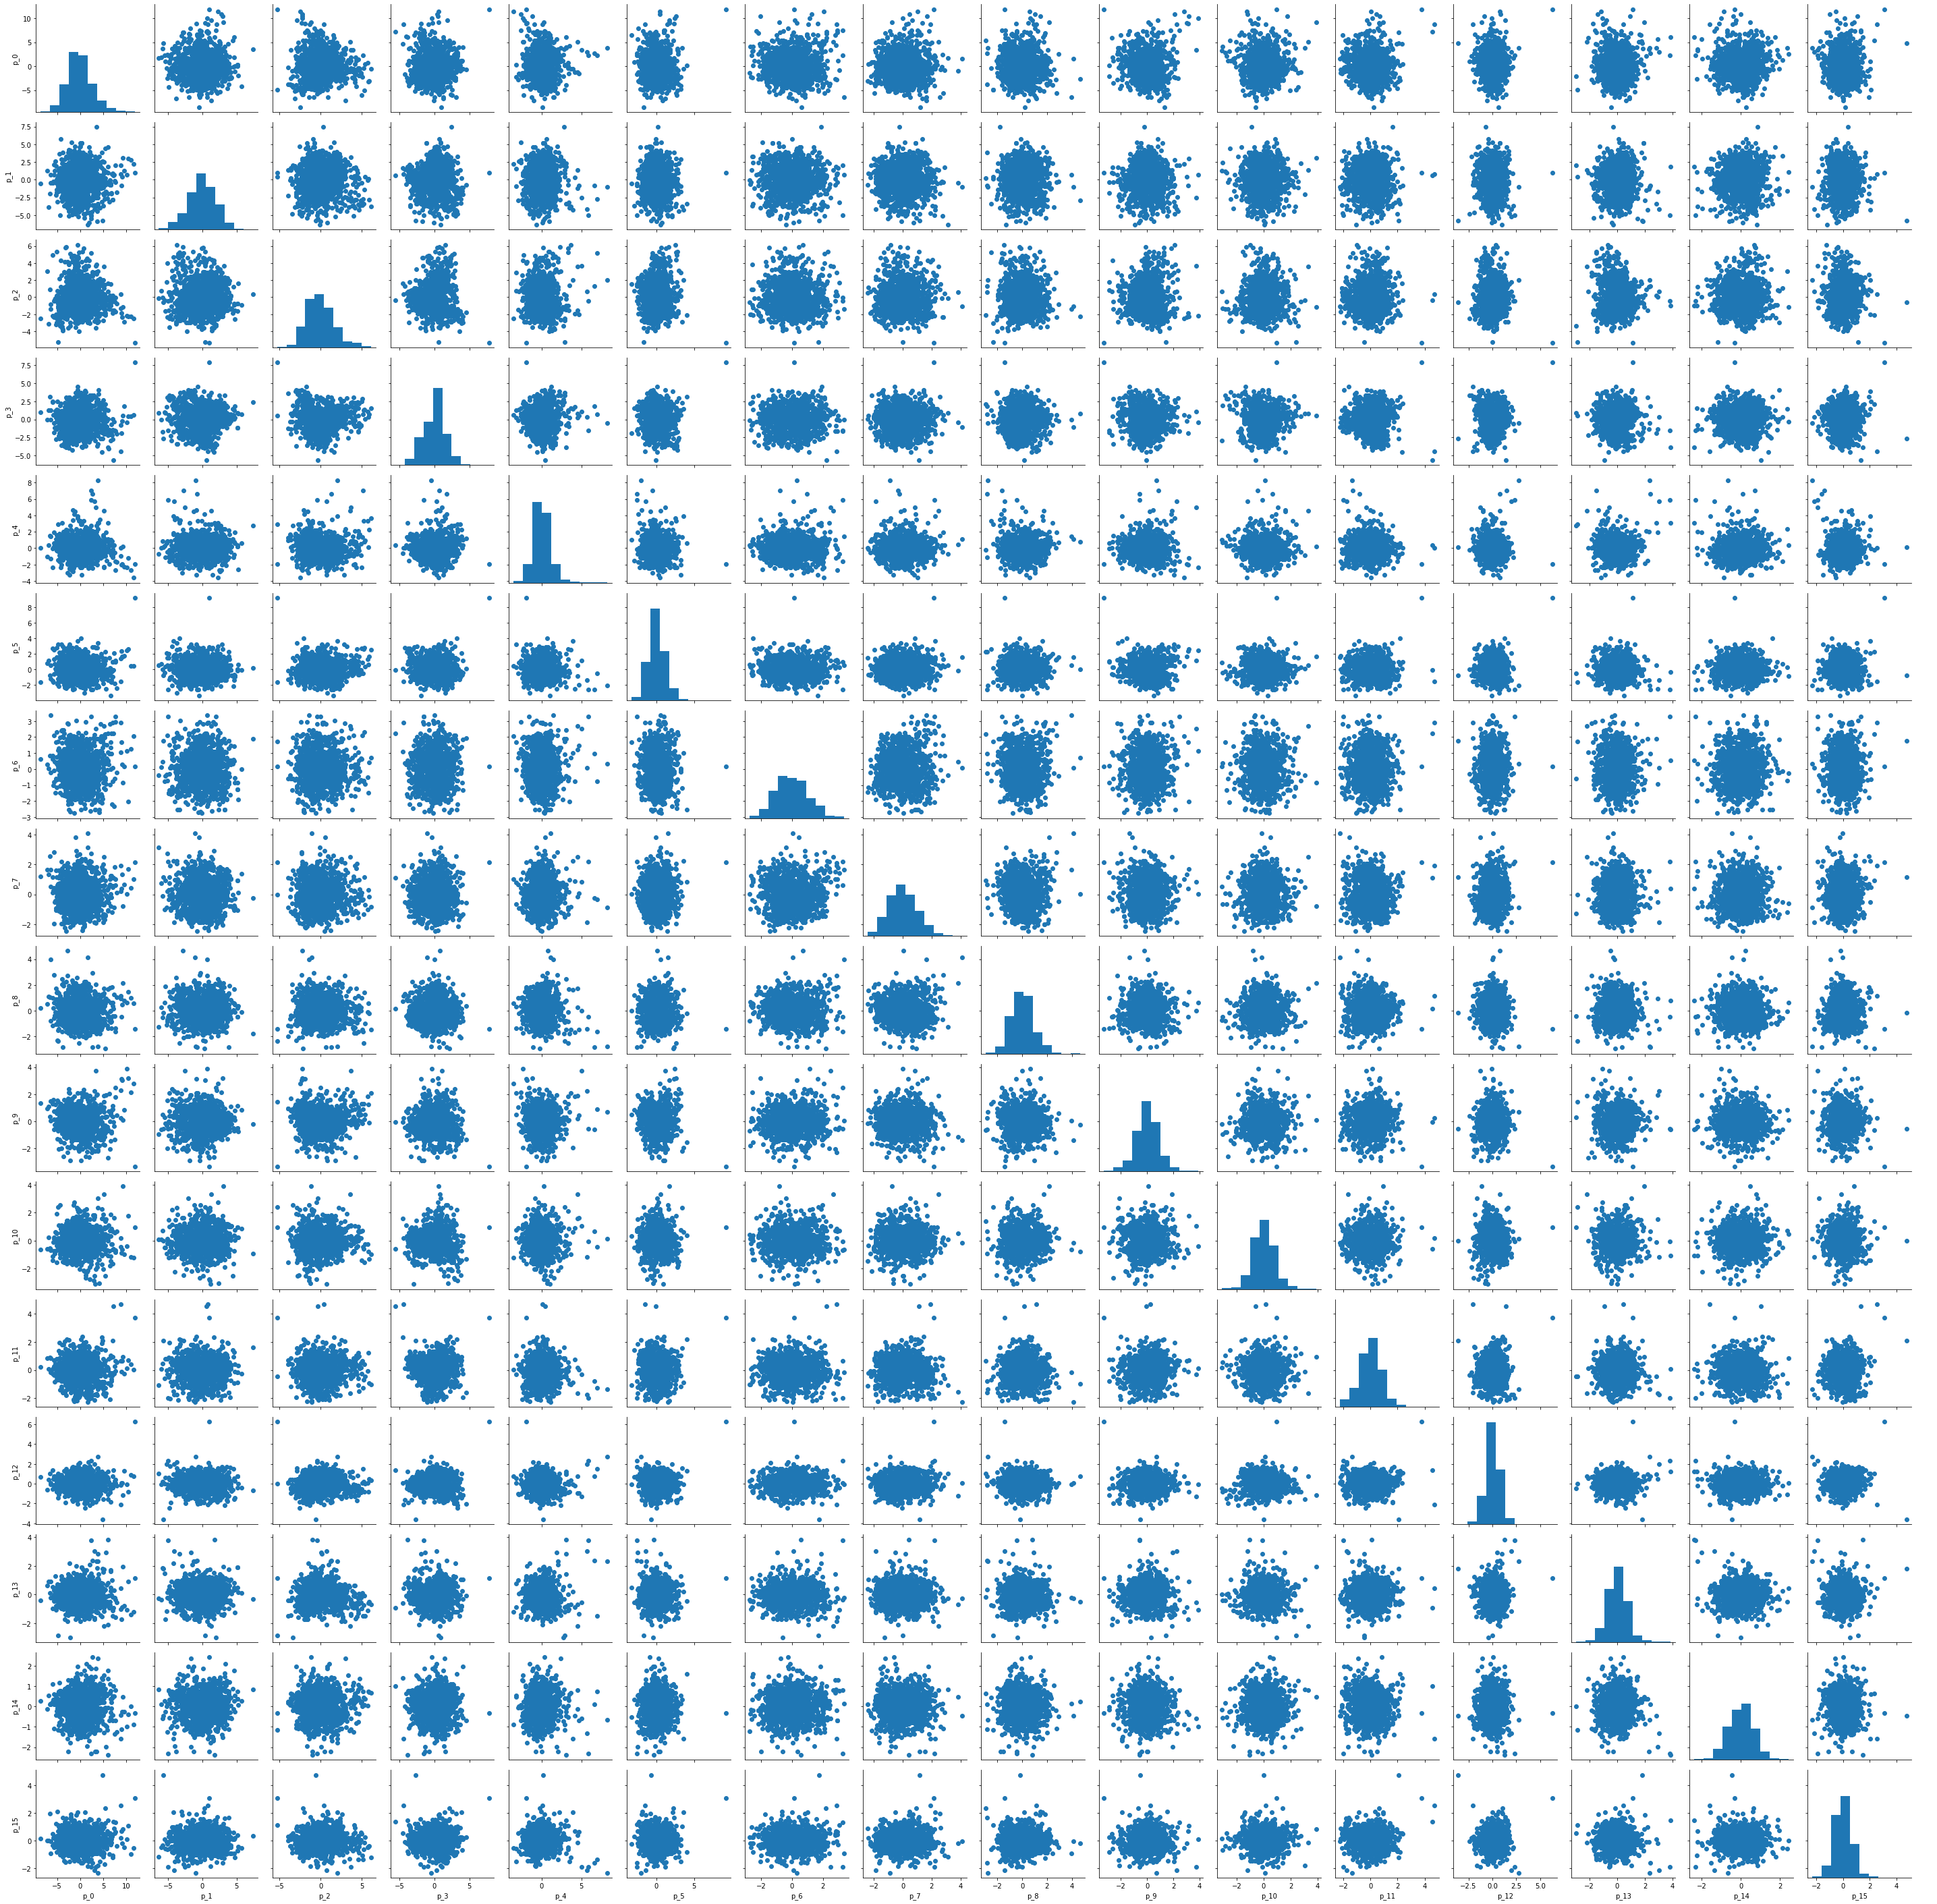

In [49]:
g = sns.PairGrid(df_pca)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

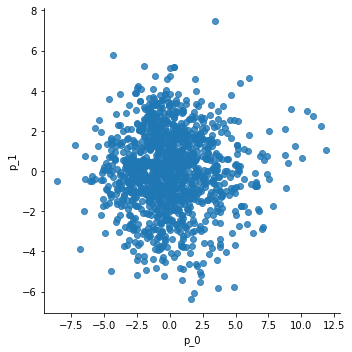

In [50]:
sns.lmplot(data=df_pca, x='p_0', y='p_1', fit_reg=False)

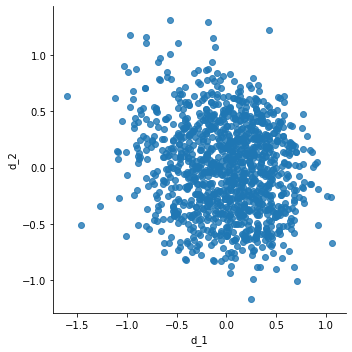

In [51]:
sns.lmplot(data=df_mds, x='d_1', y='d_2', fit_reg=False)

In [52]:
import plotly.express as px
fig = px.scatter_3d(df_mds, x='d_1', y='d_2', z='d_3')
fig.show()

In [53]:
fig = px.scatter_3d(df_pca, x='p_0', y='p_1', z='p_2')
fig.show()

# Propuesta de algorimos y segmentos o clases

Dado que no es suficientemente claro, se aplicará la técnica de Propagación de afinidad

In [60]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [61]:
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [62]:
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model1 = model1.fit(df_mds)

Text(0.5, 0, 'Número de puntos por nodo')

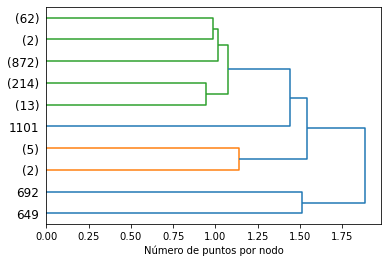

In [63]:
plot_dendrogram(model1, orientation='right', truncate_mode='lastp', p=10)
plt.xlabel('Número de puntos por nodo')

Text(0.5, 0, 'Número de puntos por nodo')

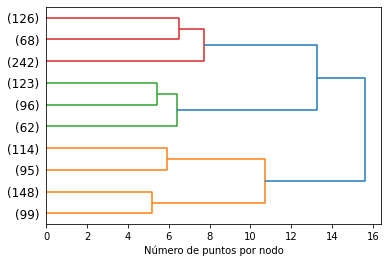

In [64]:
# Modelo 2 (WARD):
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model2 = model2.fit(df_mds)


plot_dendrogram(model2, orientation='right', truncate_mode='lastp', p=10)
plt.xlabel('Número de puntos por nodo')

Text(0, 0.5, 'Inercia')

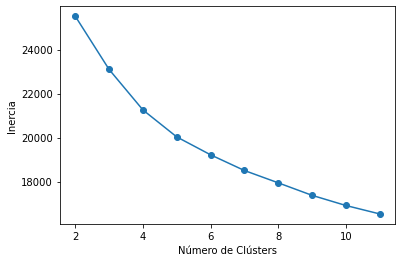

In [66]:
inertias = []
for k in range(2,12):
    kmeans = KMeans(k)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 12), inertias, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')

In [54]:
from sklearn.cluster import AffinityPropagation

In [57]:
clustering = AffinityPropagation(random_state=None).fit(df)
print("Etiquetas de Clusters:", clustering.labels_)
print("Índices de Centroides:", clustering.cluster_centers_indices_)

Etiquetas de Clusters: [17 20 19 ... 15 31 19]
Índices de Centroides: [  22   39   45  108  118  159  161  197  213  241  282  311  338  375
  401  410  440  441  481  488  505  529  541  552  633  638  648  650
  692  773  807  883  941 1001 1003 1057 1082 1090 1102 1115 1130]
